# **Beginner's Python - Session Two Physics/Engineering Answers**

## **Numerically solving an ODE**

In this exercise we will be writing some code which generates a plot of the motion of a mass hanging on the end of an (idealised) spring. This will involve solving the following linear differential equation numerically using Euler's method. 

$$\frac{d^2x}{dt^2} = -\frac{k}{m}x-g $$

If you're unfamiliar with Euler's method, you can check out https://tutorial.math.lamar.edu/classes/de/eulersmethod.aspx.


First of all, in the cell below write code which takes a user input and asks has the text "Enter initial position coordinate". 

You should assign this user input - *cast as a float* - to a variable valled ```x0```. After you've run this cell, input a value between -5.0 and 5.0 and hit enter.

In [2]:
x0 = float(input("Please input an initial position"))

Now run the cell below. You should see a graph generated which shows the numerical solutions for both velocity and position of the mass. You can also edit the parameter values at the top and re-run the cell to see the effect on the numerical solution. 

**Note:** Don't worry about the details of the code, but know that it gives us 

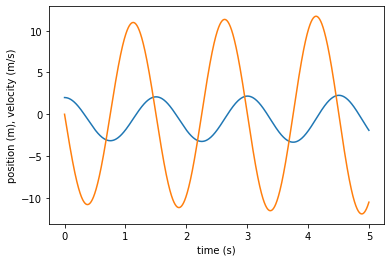

In [4]:
# Do not edit the code in this cell. You can edit the 6 parameters at the top and re-run 
# the cell to see the effect on the graph, but only after you have completed the questions.

import numpy as np
import matplotlib.pyplot as plt

N = 2000            # the number of steps used - higher N results in a more accurate result
v0 = 0.0            # initial velocity of the mass
tau = 5.0           # number of seconds we are solving over
k = 3.5             # spring constant
mass = 0.2          # mass 
gravity = 9.81      # strength of gravity 

time = np.linspace(0, tau, N)
dt = tau/float(N-1) # time between each step 

def euler_method(y, t, dt, derivs):
  y_next = y + derivs(y,t) * dt 
  return y_next

y = np.zeros([N,2])
y[0,0] = x0 
y[0,1] = v0

def SHO(state, time):
  g0 = state[1]
  g1 = - k / mass * state[0] - gravity 
  return np.array([g0, g1])

for i in range(N-1):
  y[i+1] = euler_method(y[i], time[i], dt, SHO)

x_data = [y[i,0] for i in range(N)]     # this creates a long list containing the position coordinates
v_data = [y[i,1] for i in range(N)]     # this does the same for velocity

plt.plot(time, x_data)                   # these just create a graph of the data 
plt.plot(time, v_data)
plt.xlabel("time (s)") 
plt.ylabel("position (m), velocity (m/s)") 
plt.show()

The above code also gives us two *lists*, each containing N numbers. These are ```x_data```, containing the position coordinates for a range of times, and ```v_data```, containing the velocities. Already it's clear that Python is extremely useful handling these lists, since they are too large for us to do things with them by hand.

Print below the following, replacing the #### with the correct value, rounded to 5 decimal places: **"The maximum position value achieved was #### and the maximum velocity was ####"**

In [6]:
print("The maximum position value achieved was", round(max(x_data),5), "and the maximum velocity was", round(max(v_data),5))

The maximum position value achieved was 2.26542 and the maximum velocity was 11.7252


What was the range in values of the velocity? Print your answer below to two decimal places. Remember that since ```range``` is a reserved name in Python, you should pick a different one.

In [8]:
spread = round(max(v_data) - min(v_data),2)
print(spread)

23.64


A useful feature in Python is the ability to specify a single element of a list. Each entry of a list is numbered, *starting from 0*, and you can then specify an entry by putting the position in square brackets after the list. For example:


In [10]:
example_list = [1,3,5,7,9]
print(example_list[3])
print(example_list[0])

7
1


Print below the 444th entry in the list ```v_data``` rounded to 4 decimal places (for simplicity, we will consider the first entry as the "zeroth" entry, since Python starts counting at 0.)




In [12]:
print(round(v_data[444],4))

10.9507


You can also add new elements to the end of a list, using the ```.append()``` function. You simply write the function after a list, and can put *one* new element in the brackets. 

In [14]:
example_list.append(20)
print(example_list)

[1, 3, 5, 7, 9, 20, 20]


In the cell below there is a list defined, which contains the maximum/minimum values for both position and velocity. You must add two more elements onto the list, namely the mean values for both parameters, and then print the list.

**Notes:** 
*   You should calculate the mean by summing all of the data values and dividing by the number of values, ```N```.
*   Enter values to three decimal places.

Hint: Create two new variables and then append them onto ```data_set```.

In [16]:
x_max = round(max(x_data),3)
x_min = round(min(x_data),3)
v_max = round(max(v_data),3)
v_min = round(min(v_data),3)

data_set = [x_max, x_min, v_max, v_min]

x_mean = round(sum(x_data) / N, 3)
v_mean = round(sum(v_data) / N, 3)

data_set.append(x_mean)
data_set.append(v_mean)
print(data_set)

[2.265, -3.34, 11.725, -11.919, -0.441, -0.789]
